A/B Testing is a tried-and-true method commonly performed using a traditional statistical inference approach grounded in a hypothesis test (e.g. t-test, z-score, chi-squared test). In plain English, 2 tests are run in parallel:

**Treatment Group (Group A)** - This group is exposed to the new web page, popup form, etc.

**Control Group (Group B)** - This group experiences no change from the current setup.

The goal of the A/B is then to compare **the conversion rates of the two groups** using statistical inference.

In [47]:
import pandas as pd

control_data = pd.read_csv("data/control_data.csv")
experiment_data = pd.read_csv("data/experiment_data.csv")

In [48]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [49]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [50]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [51]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [52]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [53]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [54]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


### Format Data

In [55]:
data_combined = pd.concat([control_data, experiment_data])
data_combined

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
...,...,...,...,...,...
32,"Wed, Nov 12",10042,802,NaN,NaN
33,"Thu, Nov 13",9721,829,NaN,NaN
34,"Fri, Nov 14",9304,770,NaN,NaN
35,"Sat, Nov 15",8668,724,NaN,NaN


In [56]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_combined['row_id'] = data_combined.index

# Create a Day of Week feature
data_combined['DOW'] = data_combined['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_combined.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_combined['Experiment'] = np.random.randint(2, size=len(data_combined))

# Remove missing data
data_combined.dropna(inplace=True)

# Remove Date and Payments columns
del data_combined['Date'], data_combined['Payments']

# Shuffle the data
data_combined = sklearn.utils.shuffle(data_combined)

In [57]:
data_combined.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [58]:
# Reorder the columns 
data_combined = data_combined[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [59]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_combined.loc[:, data_combined.columns != 'Enrollments'],\
                                                    data_combined['Enrollments'], test_size=0.2)

In [60]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])
X_train.head(), X_test.head()

(    row_id  Experiment  Pageviews  Clicks  DOW
 16      16           0       9535     759    1
 10      10           1      10551     864    5
 2        2           0      10480     884    1
 3        3           1       9867     827    5
 16      16           0       9655     771    1,
     row_id  Experiment  Pageviews  Clicks  DOW
 12      12           0       8324     665    4
 18      18           1       9262     727    6
 1        1           0       9288     785    3
 1        1           0       9102     779    3
 19      19           0       9345     734    4)

### Helper functions
- Function for printing the evaluation scores related to a regression problem
- Function for plotting the original values and values predicted by the model

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [62]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

### Model01: Linear Regression (Baseline)

In [63]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [21]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [22]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039912
R2_Squared: 0.05095001827038903
MAE Score: 19.58606183877513


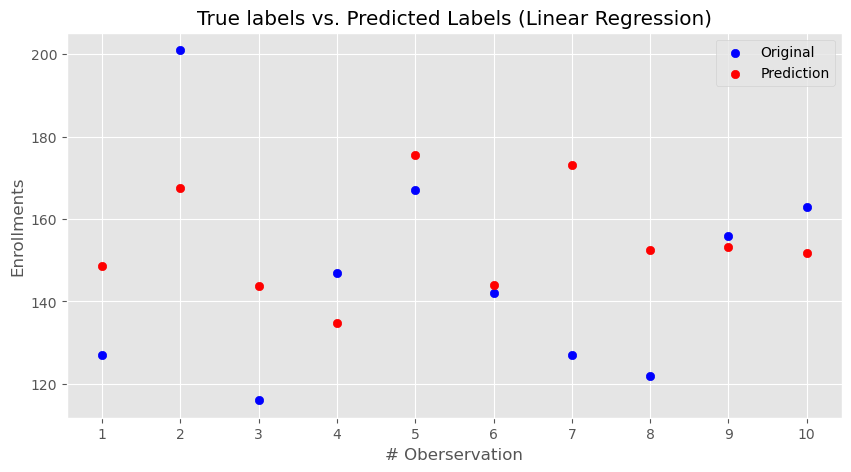

In [23]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [24]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Thu, 11 Apr 2024   Prob (F-statistic):                    7.92e-27
Time:                        13:52:11   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


### Model 02: Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


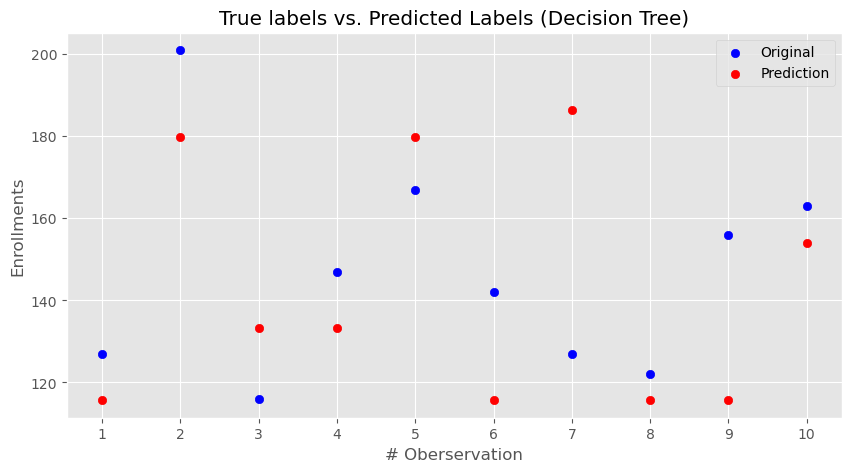

In [27]:
plot_preds(y_test, y_preds, 'Decision Tree')

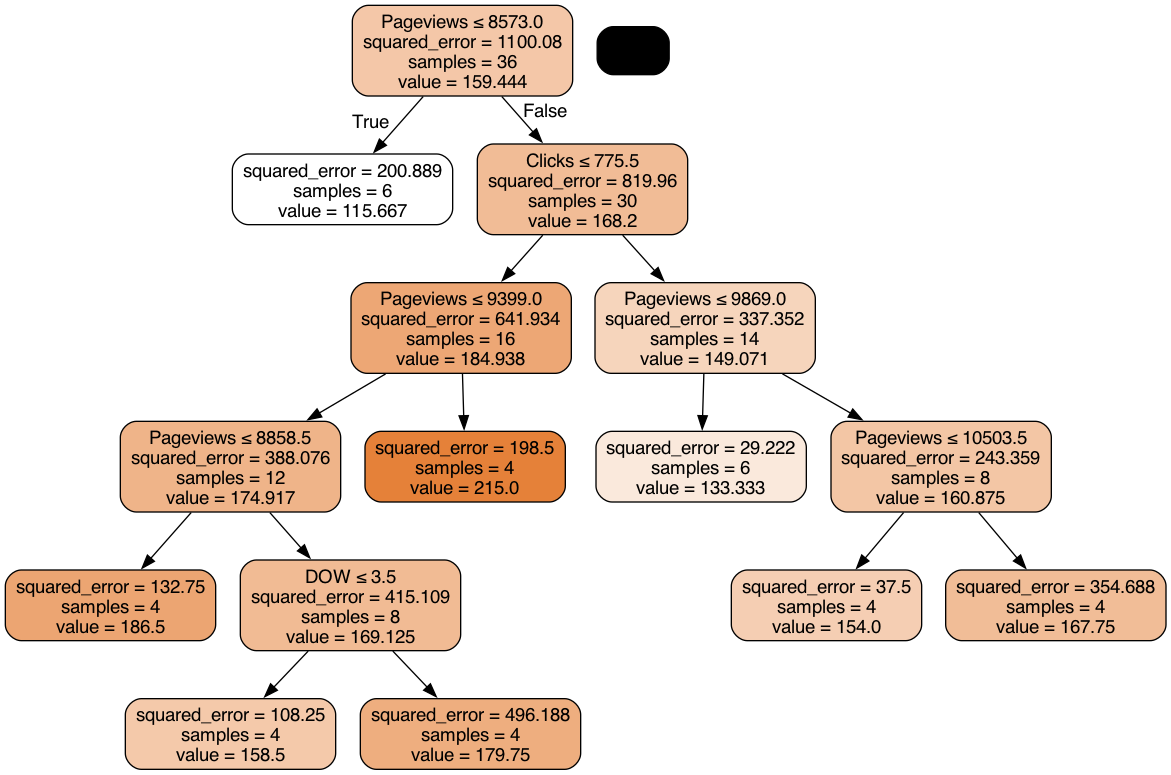

In [38]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Model 03: XGBoost

In [43]:
import xgboost as xgb
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [70]:
parameters = {
    # 'max_depth': 6,
    'objective': 'reg:squarederror',
    'booster': 'gblinear',
    # 'n_estimators': 1000,
    'learning_rate': 0.1,
    # 'gamma': 0.01,
    'random_state': 6,
    # 'subsample': 1.
}
xg_reg = xgb.train(params=parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

In [71]:
calculate_metrics(y_test, y_preds)

RMSE Score: 29.967278432515112
R2_Squared: -0.4810307023086704
MAE Score: 25.696759033203126


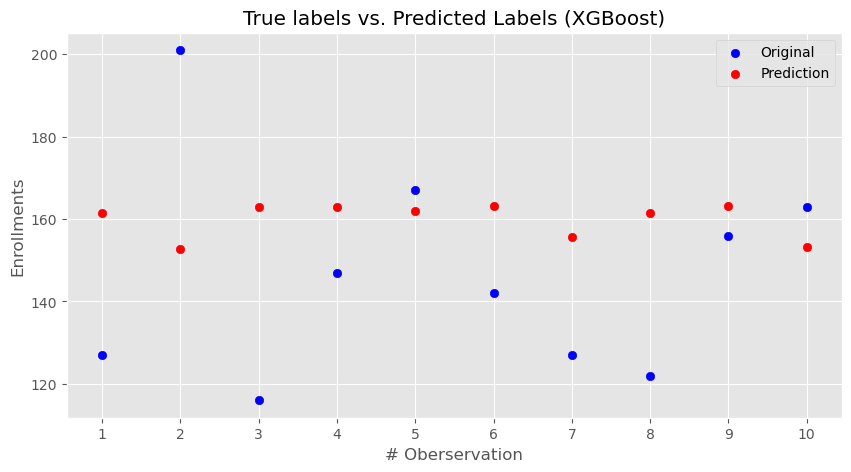

In [72]:
plot_preds(y_test, y_preds, 'XGBoost')